<a href="https://colab.research.google.com/github/pthomas234/facedetection/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using webcams to detect the face of people
The goal of the first part is to connect to the webcam from google colab, take a photo and then draw a box of the detected faces by using haar cascade algorithms from OpenCV lib

##First we install the OpenCV library and import the other packages

In [4]:
!pip install opencv-python --upgrade
import imutils
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Define the function to connect the webcam and take a photo

The code defines a function "photo_shot()" that captures an image using the user's webcam and saves it as a file.

In [5]:
def photo_shot(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [6]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [7]:
#takes the photo and stores it in "photo_shot()"
photo_shot() 

<IPython.core.display.Javascript object>

'photo.jpg'

#The function draws a box around the detected faces

The goal of the function is to takes the image as input, converts it to grayscale, detect the faces in the grayscale image using a Haar Cascade classifier, and draws bounding boxes around the detected faces.

In [8]:
# loads an image from a file called 'photo.jpg'
image = cv2.imread('photo.jpg')
# detects and visualizes faces in an input image using OpenCV
def draw_face_boxes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces: 
      cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
    cv2_imshow(image)


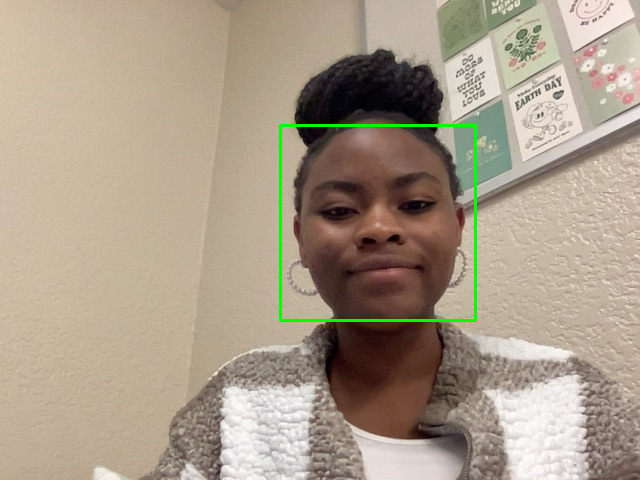

In [9]:
draw_face_boxes(image)

#  Mount your Google Drive to Colab 

The goal is download the dataset into your drive and change the current working directory to the Downloads/wiki folder in your Google Drive 

In [19]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Downloads/wiki
import os
files = os.listdir()
print(files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Downloads/wiki'
/content
['.config', 'photo.jpg', 'drive', 'sample_data']


In [20]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P /content/drive/MyDrive/faceDetection

--2023-04-04 06:25:36--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... ^C


In [12]:
!tar -xvf /content/drive/MyDrive/faceDetection/wiki.tar.gz -C /content/drive/MyDrive/faceDetection

wiki/
wiki/21/
wiki/21/2032221_1969-08-28_2009.jpg
wiki/21/13435121_1990-10-12_2011.jpg
wiki/21/24332921_1986-12-13_2013.jpg
wiki/21/6907621_1984-07-03_2013.jpg
wiki/21/7772421_1983-08-07_2014.jpg
wiki/21/20575621_1929-09-04_1954.jpg
wiki/21/21852321_1983-07-04_2011.jpg
wiki/21/21764621_1980-03-30_2013.jpg
wiki/21/36721921_1983-01-23_2010.jpg
wiki/21/39746321_1978-12-05_2015.jpg
wiki/21/30447321_1916-08-27_1984.jpg
wiki/21/22945721_1983-07-14_2014.jpg
wiki/21/562821_1966-01-01_2005.jpg
wiki/21/10461721_1968-01-31_1994.jpg
wiki/21/5874821_1976-07-14_2002.jpg
wiki/21/2604421_1956-05-04_2011.jpg
wiki/21/40766721_1992-03-30_2014.jpg
wiki/21/43198621_1994-06-11_2014.jpg
wiki/21/46683221_1941-01-16_1964.jpg
wiki/21/26932721_1931-11-24_1976.jpg
wiki/21/25665421_1986-11-13_2007.jpg
wiki/21/30103521_1987-07-08_2014.jpg
wiki/21/19059121_1983-07-12_2012.jpg
wiki/21/14527821_1951-03-01_1950.jpg
wiki/21/1521421_1970-03-24_2011.jpg
wiki/21/4525421_1981-05-20_2007.jpg
wiki/21/15402721_1969-03-26_1998

In [13]:
!ls /content/drive/MyDrive/faceDetection/wiki/21

10026321_1984-05-17_2014.jpg  33127621_1993-03-27_2013.jpg
10028621_1956-10-10_2010.jpg  33135021_1989-11-05_2011.jpg
10172021_1963-06-02_2006.jpg  332221_1903-07-21_2007.jpg
101721_1971-07-21_2011.jpg    33278921_1979-01-16_2005.jpg
104121_1890-08-24_1970.jpg    3339321_1905-12-04_1978.jpg
10461721_1968-01-31_1994.jpg  33447121_1929-03-10_1958.jpg
1049021_1982-04-23_2010.jpg   3347121_1986-08-11_2009.jpg
10550921_1945-09-03_2004.jpg  33915521_1635-07-29_1947.jpg
1056321_1912-08-12_1987.jpg   34087021_1978-05-10_2011.jpg
10566421_1984-03-12_2008.jpg  341121_1975-04-05_2014.jpg
1060521_1959-11-30_2007.jpg   341721_1917-03-01_1965.jpg
10678321_1990-11-11_2015.jpg  3429221_1962-10-12_2007.jpg
10803621_1901-10-14_2008.jpg  34327821_1991-09-13_2013.jpg
11043021_1953-05-21_2003.jpg  34381021_1992-04-21_2014.jpg
11067821_1982-09-22_2014.jpg  3439221_1978-11-10_2011.jpg
11086621_1987-03-19_2010.jpg  3439921_1972-01-24_2014.jpg
1110921_1944-11-07_1968.jpg   344221_1927-09-17_1955.jpg
11157521_1

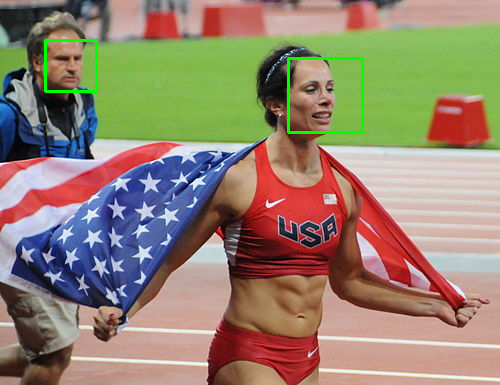

In [21]:
# Show one of the pictures in the wiki dataset and draw box the detected faces
img = cv2.imread("/content/drive/MyDrive/faceDetection/wiki/21/9511621_1982-02-05_2012.jpg")
draw_face_boxes(img)

Find the face box of an image by reading the wiki.mat file using the pymatreader library

In [22]:
!pip install pymatreader
import pymatreader 
from pymatreader import read_mat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The code loads the wiki.mat file, selects an image at a specific index, loads the image from file using the path stored in the .mat file, retrieves the face box coordinates, and lastly, draw the face box on the image using OpenCV

In [58]:
mat = read_mat('/content/drive/MyDrive/faceDetection/wiki/wiki.mat')
# Choose an image index
# image_idx = 100
print(len(mat['wiki']['full_path']))
print(len(mat['wiki']['face_location']))

print(type(mat['wiki']))

print(mat['wiki'].keys())
print(mat['wiki']['full_path'][6])
print(mat['wiki']['face_location'][6])

# Load the image from file
image_path = mat['wiki']['full_path'][6]
image = cv2.imread(image_path)
print(image_path)

# Get the face box for this image
face_box = mat['wiki']['face_location'][6]
print(face_box)

# Draw the face box on the image
cv2.rectangle(image, (int(face_box[0]), int(face_box[1])), 
              (int(face_box[2]), int(face_box[3])), (0, 255, 0), 2)


62328
62328
<class 'dict'>
dict_keys(['dob', 'photo_taken', 'full_path', 'gender', 'name', 'face_location', 'face_score', 'second_face_score'])
41/10003541_1937-09-27_1971.jpg
[ 79.35580189  26.65993396 197.60950472 144.91363679]
41/10003541_1937-09-27_1971.jpg
[ 79.35580189  26.65993396 197.60950472 144.91363679]


 # Intersection over Union (IoU)

It is defined as the area of intersection between the predicted box and the ground truth box divided by the area of union between the two boxes.

In [62]:
def iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0]) # left
    yA = max(boxA[1], boxB[1]) # top
    xB = min(boxA[2], boxB[2]) # right
    yB = min(boxA[3], boxB[3]) # bottom
    # calculate the area of intersection rectangle
    interArea = (xB - xA + 1) * (yB - yA + 1)
    # caluculate the area of both the prediction and ground-truth rectangles 
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # caluculate the intersection over union
    # iou = intersection area and divided by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

print(iou)

<function iou at 0x7fc9a8fc8940>


The get_face_boxes function returns a dictionary of face boxes detected in the image using OpenCV's Haar Cascade classifier.

In [63]:
def get_face_boxes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    face_boxes = {}
    for i, (x, y, w, h) in enumerate(faces):
        box = {'x1': x, 'y1': y, 'x2': x+w, 'y2': y+h}
        face_boxes[f'face_{i}'] = box
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
    return face_boxes

image = cv2.imread('photo.jpg')
face_boxes = get_face_boxes(image)
print(face_boxes)

{'face_0': {'x1': 280, 'y1': 125, 'x2': 475, 'y2': 320}}


In [28]:
import os
import numpy as np
import cv2
import json
import scipy.io
from scipy.io import loadmat


A list of the ground truth bounding boxes for all valid images in the dataset.

In [64]:
# Define paths
data_path = '/content/drive/MyDrive/faceDetection/wiki'
annotations_path = '/content/drive/MyDrive/faceDetection/wiki/wiki.mat'

# Load annotations
mat_annotations = loadmat(annotations_path)
annotations = mat_annotations['wiki'][0]
# print(annotations)

# Create list of ground truth bounding boxes for all valid images
gt_bboxes = []
for i, annotation in enumerate(annotations):
    if (annotation['face_score'] >= 1).all() and (annotation['second_face_score'] < 0).all():
        bbox = annotation['face_location'][6]
        bbox = [int(b) for b in bbox]
        gt_bboxes.append({'filename': str(i+1) + '.jpg', 'bbox': bbox})

print(len(gt_bboxes))

0


Calculate the IOU for each image and sum all the IOUs to calculate the average IOU

In [65]:
iou_sum = 0
num_images = len(gt_bboxes)
for gt_bbox in gt_bboxes:
    # Load image
    img_path = os.path.join(data_path, gt_bbox['filename'])
    img = cv2.imread(img_path)

    # Get predicted bounding box
    pred_bbox = face_boxes.get(gt_bbox['filename'], None)

    # Calculate IOU
    if pred_bbox is not None:
        iou = calculate_iou(gt_bbox['bbox'], pred_bbox)
        iou_sum += iou
        num_images += 1


# Calculate average IOU
if num_images > 0:
    avg_iou = iou_sum / num_images
    print("Average IOU: {:.2f}".format(avg_iou))
else:
    print("No valid ground truth bounding boxes found.")

No valid ground truth bounding boxes found.
